In [118]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import BayesianRidge, LinearRegression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn import preprocessing
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor

In [119]:
db = pd.read_csv('HappinessAlcoholConsumption.csv')

## Pré-Processamento

### O banco de dados não tem nenhum dado faltando, como mostrado abaixo 

In [120]:
db.isnull().sum()

Country             0
Region              0
Hemisphere          0
HappinessScore      0
HDI                 0
GDP_PerCapita       0
Beer_PerCapita      0
Spirit_PerCapita    0
Wine_PerCapita      0
dtype: int64

### Visualizando a base de dados

In [121]:
db

,Country,Region,Hemisphere,HappinessScore,HDI,GDP_PerCapita,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita
0,Denmark,Western Europe,north,7526,928,53579,224,81,278
1,Switzerland,Western Europe,north,7509,943,79866,185,100,280
2,Iceland,Western Europe,north,7501,933,60530,233,61,78
3,Norway,Western Europe,north,7498,951,70890,169,71,129
4,Finland,Western Europe,north,7413,918,43433,263,133,97
5,Canada,North America,north,7404,922,42349,240,122,100
6,Netherlands,Western Europe,north,7339,928,45638,251,88,190
7,New Zealand,Australia and New Zealand,south,7334,915,40332,203,79,175
8,Australia,Australia and New Zealand,south,7313,938,49897,261,72,212
9,Sweden,Western Europe,north,7291,932,51845,152,60,186


### Os dados da coluna *HappinessScore* são medidas de 2016, perguntando às pessoas: "Como você classificaria sua felicidade em uma escala de 0 a 10, onde 10 é a mais feliz?". Assim estão representados de forma errada, pois são médias de 0 a 10. Para corrigir isso, vamos dividir os dados da coluna por 1000


In [122]:
db['HappinessScore'] = db['HappinessScore']/1000

### Os dados das colunas *Hemisphere* e *Region* são desnecessários, optamos então por removê-las 

In [123]:
del db['Hemisphere']
del db['Region']
#del db['Country']

### Removendo dados duplicados

In [124]:
db = db.drop_duplicates(None, 'first')

In [125]:
db.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122 entries, 0 to 121
Data columns (total 7 columns):
Country             122 non-null object
HappinessScore      122 non-null float64
HDI                 122 non-null int64
GDP_PerCapita       122 non-null int64
Beer_PerCapita      122 non-null int64
Spirit_PerCapita    122 non-null int64
Wine_PerCapita      122 non-null int64
dtypes: float64(1), int64(5), object(1)
memory usage: 7.6+ KB


### Analisando a matriz de correlação 

In [126]:
df = pd.DataFrame(db)
corr = df.corr()
corr.style.background_gradient().set_precision(2)

,HappinessScore,HDI,GDP_PerCapita,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita
HappinessScore,1,0.82,0.72,0.49,0.26,0.45
HDI,0.82,1,0.71,0.59,0.39,0.6
GDP_PerCapita,0.72,0.71,1,0.39,0.08,0.59
Beer_PerCapita,0.49,0.59,0.39,1,0.36,0.47
Spirit_PerCapita,0.26,0.39,0.08,0.36,1,0.12
Wine_PerCapita,0.45,0.6,0.59,0.47,0.12,1


### Utilizando o boxplot para visualização de *outliers*.  Por se tratar do Índice de Produto Interno Bruto, a coluna GDP realmente tem dados distantes, então não é necessário a correção desses dados

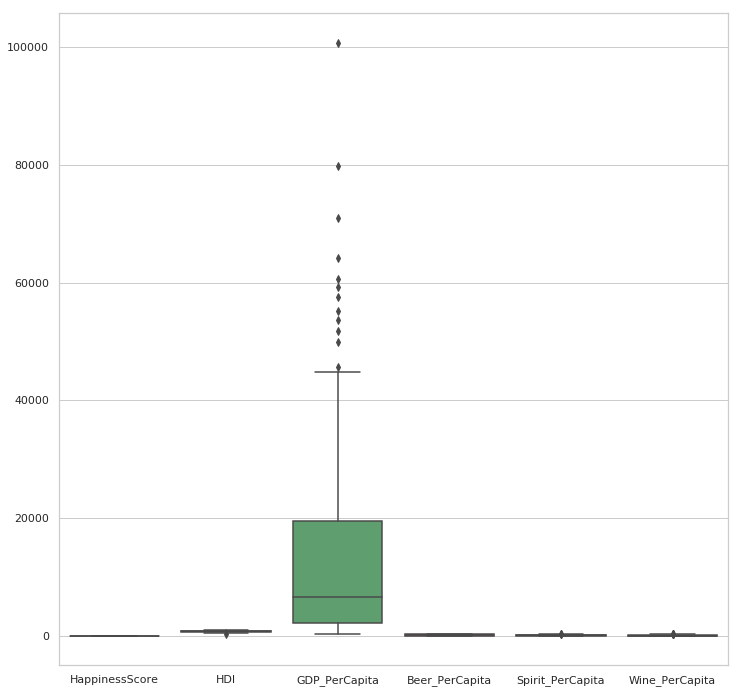

In [127]:
sns.set(style="whitegrid", color_codes=True)
sns.boxplot(data=db);

### Dividindo DB entre treinamento e teste, deixando como saida a coluna HappinessScore


In [128]:
X_train = db.iloc[:,:6]
y_train = db.iloc[:,1]
del X_train['HappinessScore']

In [129]:
hist_dataset = X_train['Country']
hist_dataset = pd.Categorical(hist_dataset).codes

In [130]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122 entries, 0 to 121
Data columns (total 5 columns):
Country             122 non-null object
HDI                 122 non-null int64
GDP_PerCapita       122 non-null int64
Beer_PerCapita      122 non-null int64
Spirit_PerCapita    122 non-null int64
dtypes: int64(4), object(1)
memory usage: 5.7+ KB


In [131]:
X_train.head()

,Country,HDI,GDP_PerCapita,Beer_PerCapita,Spirit_PerCapita
0,Denmark,928,53579,224,81
1,Switzerland,943,79866,185,100
2,Iceland,933,60530,233,61
3,Norway,951,70890,169,71
4,Finland,918,43433,263,133


In [132]:
y_train.head()

0    7.526
1    7.509
2    7.501
3    7.498
4    7.413
Name: HappinessScore, dtype: float64

In [133]:
#from sklearn.model_selection import train_test_split

 #70% treinamento e 30% teste
#X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.3)

In [134]:
# Função que retorna os resultados do modelo
from sklearn.model_selection import train_test_split

def retornaResultadosModeloKNN_Regressao(random_state, quantidade, dados, respostas):
    #Divisão entre observações de teste e observações de treino
    X_train, X_test, y_train, y_test = train_test_split(dados, respostas, random_state = random_state)
    # Vetores de armazenamento dos resultados de teste e de treino
    quantidade_k = range(1,quantidade + 1)
    res_teste = []
    res_treino = []
    
    # loop das regressão
    for i in quantidade_k:
        knn = KNeighborsRegressor(n_neighbors = i)
        knn.fit(X_train, y_train)

        # Adicionando os valores dos resultados a seus respectivos vetores
        res_treino.append(knn.score(X_train, y_train))
        res_teste.append(knn.score(X_test, y_test))
        
    return quantidade_k, res_treino, res_teste

In [135]:
# Print de alguns resultados
quantidade_k, res_treino, res_teste = retornaResultadosModeloKNN_Regressao(100, 30, X_train, y_train)
i = 4
print("Treino {} : {}".format(i, res_treino[i]))
print("Teste {} : {}".format(i, res_teste[i]))

ValueError: could not convert string to float: 'Australia'

In [ ]:
dados = X_train
respostas = y_train

legendas = ["Treino", "Teste"]
quantidade = 20
rand = 5
quantidade_k, res_treino, res_teste = retornaResultadosModeloKNN_Regressao(rand, quantidade, dados, respostas)
plt.rcParams["figure.figsize"] = [8,8]
plt.plot(res_treino)
plt.plot(res_teste)
plt.legend(legendas)
plt.grid(True)
plt.xticks(np.arange(0,20, step=1))
plt.show()